# Importing Libraries

Python has a wide array of tools that can help us analyse, model and make predictions. In this project I'll be using __numpy__ and __pandas__ to handle the data, __seaborn__ and __matplotlib__ for visualization and __scikit-learn__ to create the model and make the predcitions.

Another library that can be proved very useful is __statsmodels__, to see some more statistics to help deceding which explanatory data to use to train our models.

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
%matplotlib inline

# The Dataset

## Medical Cost Personal Datasets

The dataset can be found on _Kaggle_ <strong><a href="https://www.kaggle.com/mirichoi0218/insurance/">here</a></strong>.

### Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

### Content
#### Columns

`age`: age of primary beneficiary.

`sex`: insurance contractor gender, female, male.

`bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height.
> objective index of body weight $(kg \div m ^ 2)$ using the ratio of height to weight, ideally 18.5 to 24.9.

`children`: Number of children covered by health insurance / Number of dependents.

`smoker`: Smoking.

`region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

`charges`: Individual medical costs billed by health insurance.

### Inspiration
Can you accurately predict insurance costs?

In [130]:
FILE_PATH = 'insurance.csv'
data = pd.read_csv(FILE_PATH)

In [131]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
print(f'The dataset has {data.shape[0]} records.')

The dataset has 1338 records.


In [133]:
print(f'The dataset has missing values: {data.isna().values.any()}.')

The dataset has missing values: False.


# <font style="color:red">Initial Analysis</font>
<hr style='border: 2px solid red;'>

In [134]:
data.describe().round(4)

,age,bmi,children,charges
count,1338.000,1338.0000,1338.0000,1338.0000
mean,39.207,30.6634,1.0949,13270.4223
std,14.050,6.0982,1.2055,12110.0112
min,18.000,15.9600,0.0000,1121.8739
25%,27.000,26.2962,0.0000,4740.2872
50%,39.000,30.4000,1.0000,9382.0330
75%,51.000,34.6938,2.0000,16639.9125
max,64.000,53.1300,5.0000,63770.4280


In [135]:
data.corr().round(4)

,age,bmi,children,charges
age,1.0000,0.1093,0.0425,0.2990
bmi,0.1093,1.0000,0.0128,0.1983
children,0.0425,0.0128,1.0000,0.0680
charges,0.2990,0.1983,0.0680,1.0000


### Some conclusions

- The average person in the dataset has around 39 years of age.
- The average __bmi__ is 30.6, which means, that these people on average are either overweight or obese (strage I).
- Investigation needed for the charges, might contain outliers, min and max too far from the mean.
- From the numeric data _age_ and _bmi_ seem to be the ones with a bigger correlation to the charges.

In [136]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# <font style="color:red">Data Visualization</font>
<hr style='border: 2px solid red;'>

In [137]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

<AxesSubplot:title={'center':'Insurance Charges'}, ylabel='$'>

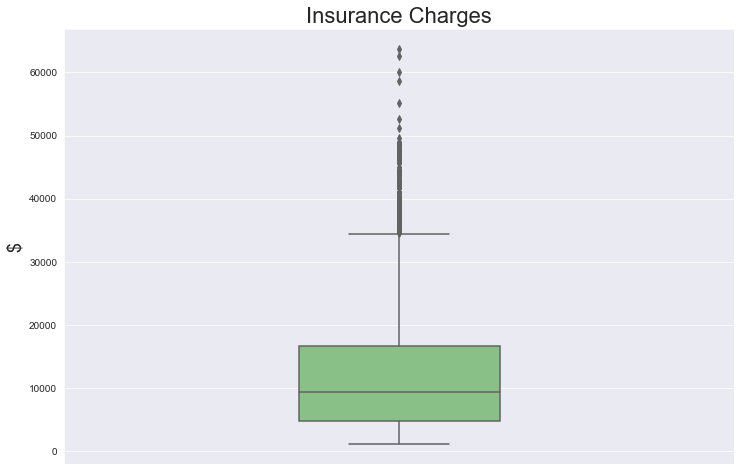

In [138]:
ax = sns.boxplot(y='charges', data=data, width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax

<AxesSubplot:title={'center':'Insurance Charges by Sex'}, xlabel='Sex', ylabel='$'>

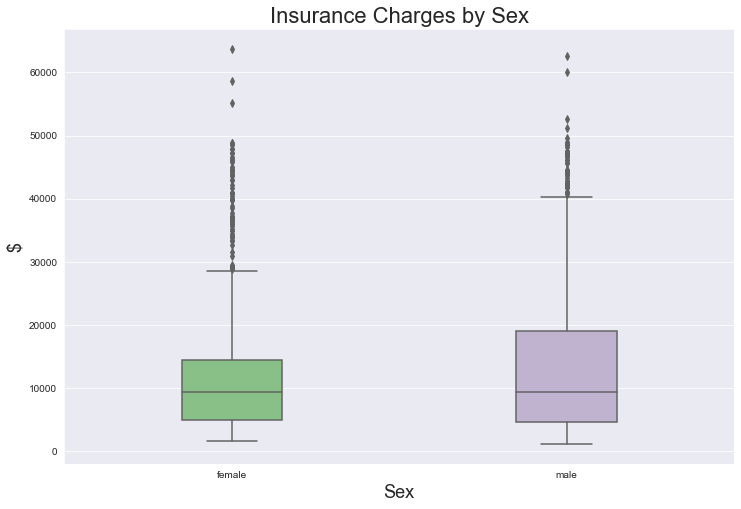

In [139]:
ax = sns.boxplot(y='charges', x='sex', data=data, width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges by Sex', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax.set_xlabel('Sex', fontsize=18)
ax

In [140]:
gender = pd.DataFrame(data['sex'].value_counts())
gender.columns = ['Count']
gender.columns.name = 'Sex'
gender

Sex,Count
male,676
female,662


<AxesSubplot:title={'center':'Insurance Charges for Smokers and non Smokers'}, xlabel='Smoker?', ylabel='$'>

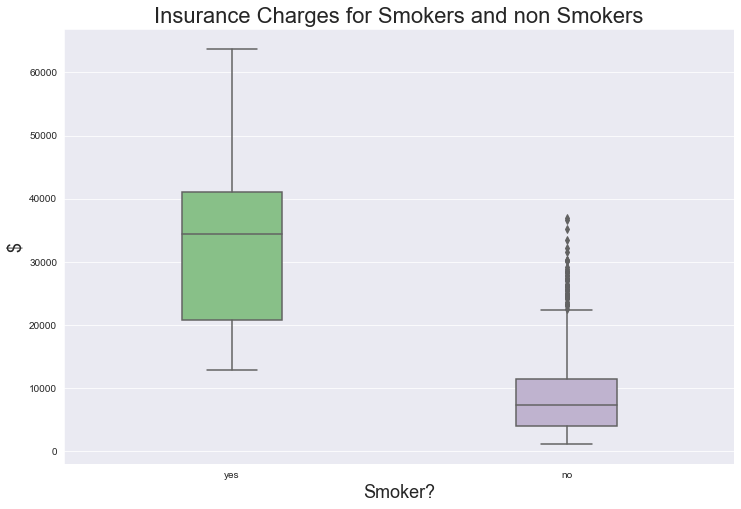

In [141]:
ax = sns.boxplot(y='charges', x='smoker', data=data, width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges for Smokers and non Smokers', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax.set_xlabel('Smoker?', fontsize=18)
ax

<AxesSubplot:title={'center':'Insurance Charges Based on Number of Children'}, xlabel='Number of Children', ylabel='$'>

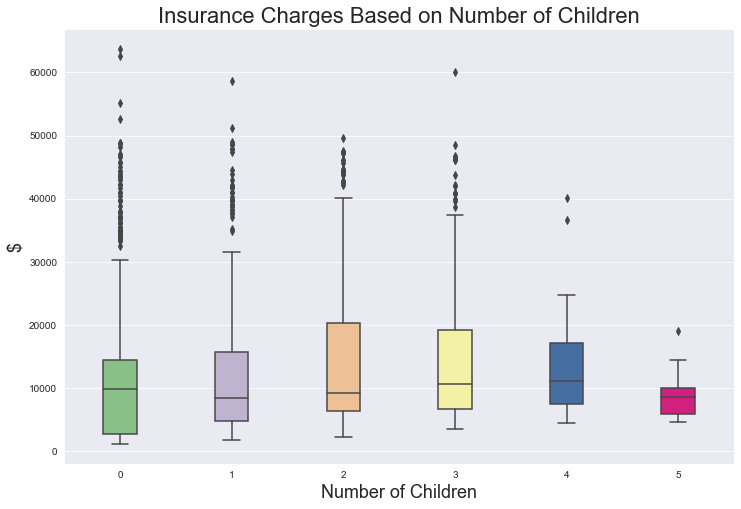

In [142]:
ax = sns.boxplot(y='charges', x='children', data=data, width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges Based on Number of Children', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax.set_xlabel('Number of Children', fontsize=18)
ax

<AxesSubplot:title={'center':'Insurance Charges Based on Region'}, xlabel='Region', ylabel='$'>

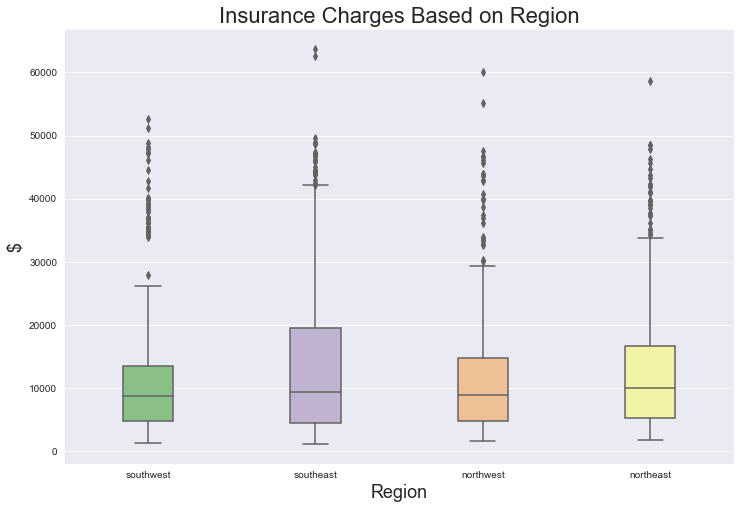

In [143]:
ax = sns.boxplot(y='charges', x='region', data=data, width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges Based on Region', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax.set_xlabel('Region', fontsize=18)
ax

<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Charges', ylabel='Count'>

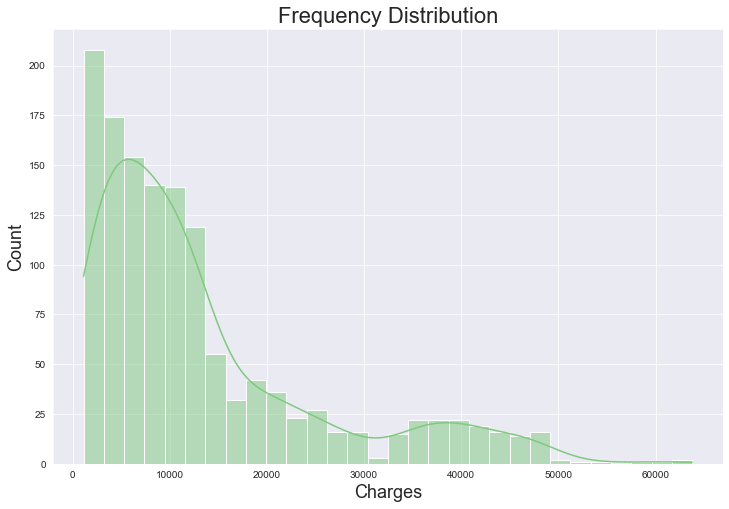

In [144]:
ax = sns.histplot(x='charges', data=data, kde=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Frequency Distribution', fontsize=22)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('Charges', fontsize=18)
ax

In [145]:
data_columns = ['age', 'bmi', 'children']
data_columns

['age', 'bmi', 'children']

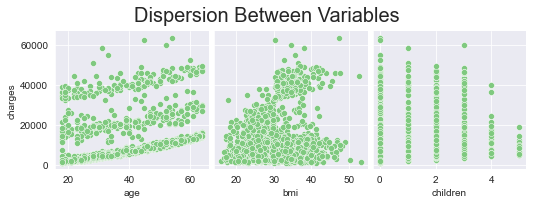

In [146]:
ax = sns.pairplot(y_vars='charges', x_vars=data_columns, data=data, diag_kind=None)
ax.fig.suptitle('Dispersion Between Variables', fontsize = 20, y = 1.1)
ax

# <font style="color:red">Enconding the Data</font>
<hr style='border: 2px solid red;'>

In [147]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [149]:
data_copy = data.copy()
encoded_data = data_copy
encoded_data['smoker'] = le.fit_transform(data_copy['smoker'])
encoded_data['sex'] = le.fit_transform(data_copy['sex'])
encoded_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


# <font style="color:red">Model and Prediction as the Data Is</font>
<hr style='border: 2px solid red;'>

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
y = encoded_data['charges']
X = encoded_data[['age', 'sex', 'bmi', 'children', 'smoker']]
X.head(1)

,age,sex,bmi,children,smoker
0,19,0,27.9,0,1


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [154]:
model_initial = LinearRegression()
model_initial.fit(X_train, y_train)

LinearRegression()

In [155]:
initial_model_score = model_initial.score(X_train, y_train)
print(f'R² score for the inital model (trainning set): {initial_model_score:.2f}')

R² score for the inital model (trainning set): 0.74


In [156]:
initial_y_pred = model_initial.predict(X_test)

initial_pred_score = metrics.r2_score(y_test, initial_y_pred)
print(f'R² score for the inital model (trainning set): {initial_pred_score:.2f}')

R² score for the inital model (trainning set): 0.80


# <font style="color:red">Model and Prediction with log Data</font>
<hr style='border: 2px solid red;'>

In [157]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [158]:
encoded_data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,southwest,16884.924


In [159]:
log_data = encoded_data.copy()

log_data['log_charges'] = np.log(log_data['charges'])
log_data['log_age'] = np.log(log_data['age'])
log_data['log_children'] = np.log(log_data['children'] + 1)
log_data['log_bmi'] = np.log(log_data['bmi'])

log_data.head(1)

,age,sex,bmi,children,smoker,region,charges,log_charges,log_age,log_children,log_bmi
0,19,0,27.9,0,1,southwest,16884.924,9.734176,2.944439,0.0,3.328627


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Charges', ylabel='Count'>

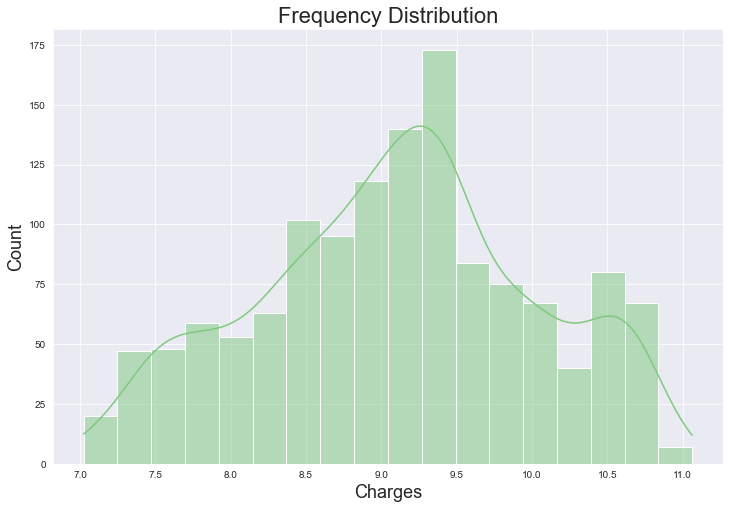

In [160]:
ax = sns.histplot(x='log_charges', data=log_data, kde=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Frequency Distribution', fontsize=22)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('Charges', fontsize=18)
ax

In [161]:
y = log_data['log_charges']
X = log_data[['log_age', 'sex', 'log_bmi', 'log_children', 'smoker']]
X.head(1)

,log_age,sex,log_bmi,log_children,smoker
0,2.944439,0,3.328627,0.0,1


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [163]:
log_model = LinearRegression()
log_model.fit(X_train, y_train)

LinearRegression()

In [164]:
log_model_score = log_model.score(X_train, y_train)
print(f'R² score for the inital model (trainning set): {log_model_score:.2f}')

R² score for the inital model (trainning set): 0.76


In [165]:
log_y_pred = log_model.predict(X_test)

log_pred_score = metrics.r2_score(y_test, log_y_pred)
print(f'R² score for the inital model (trainning set): {log_pred_score:.2f}')

R² score for the inital model (trainning set): 0.78


# <font style="color:red">Model and Prediction removing possible outliers</font>
<hr style='border: 2px solid red;'>

In [166]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IIQ = Q3 - Q1

lower_limit = Q1 - 1.5 * IIQ
higher_limit = Q3 + 1.5 * IIQ

outliers = data.query('(charges < @lower_limit) | (charges > @higher_limit)')
outliers.describe().round(4)

,age,bmi,children,charges
count,139.0000,139.0000,139.0000,139.0000
mean,41.0791,35.5646,1.1871,42103.9472
std,13.8014,4.4349,1.1265,5582.1681
min,18.0000,22.8950,0.0000,34617.8406
25%,30.0000,32.6675,0.0000,37786.1500
50%,43.0000,35.2000,1.0000,40974.1649
75%,52.5000,37.6600,2.0000,45786.7064
max,64.0000,52.5800,4.0000,63770.4280


<AxesSubplot:title={'center':'Insurance Charges'}, ylabel='$'>

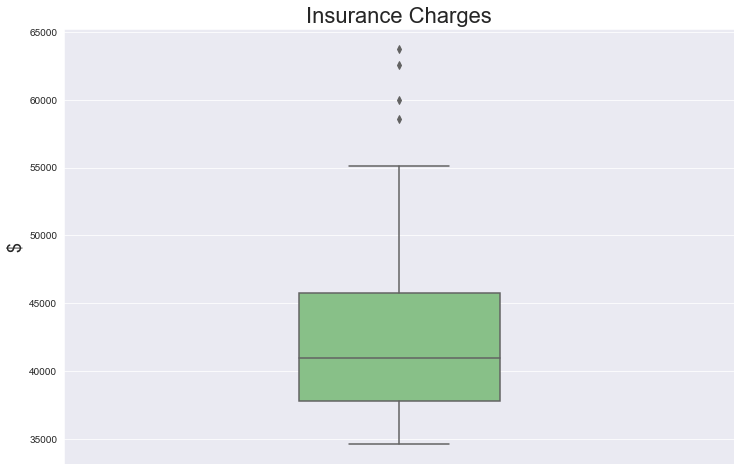

In [167]:
ax = sns.boxplot(y='charges', data=outliers, width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax

<AxesSubplot:title={'center':'Insurance Charges'}, ylabel='$'>

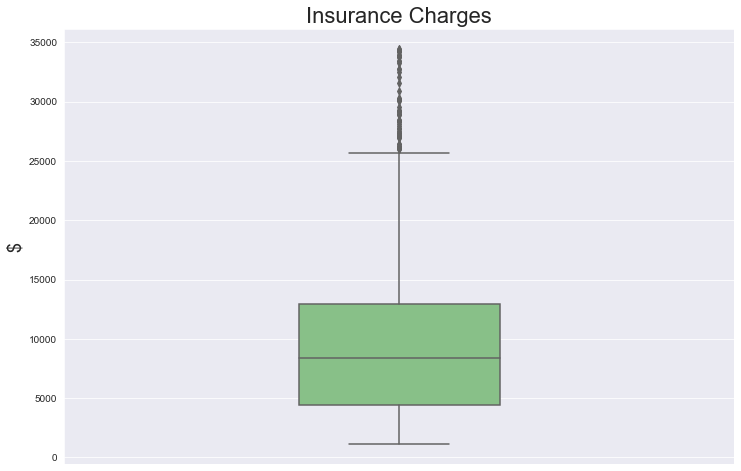

In [168]:
ax = sns.boxplot(y='charges', data=data.query('@lower_limit <= charges <= @higher_limit'), width=0.3)
ax.figure.set_size_inches(12, 8)
ax.set_title('Insurance Charges', fontsize=22)
ax.set_ylabel('$', fontsize=18)
ax

In [169]:
data_no_outliers = encoded_data.query('@lower_limit <= charges <= @higher_limit')
data_no_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Charges', ylabel='Count'>

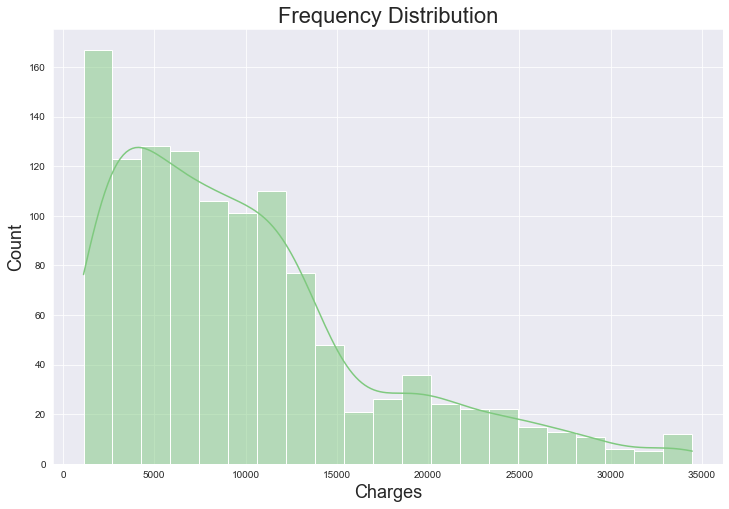

In [170]:
ax = sns.histplot(x='charges', data=data_no_outliers, kde=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Frequency Distribution', fontsize=22)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('Charges', fontsize=18)
ax

In [171]:
y = data_no_outliers['charges']
X = data_no_outliers[['age', 'sex', 'bmi', 'children', 'smoker']]
X.head(1)

,age,sex,bmi,children,smoker
0,19,0,27.9,0,1


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [173]:
no_outliers_model = LinearRegression()
no_outliers_model.fit(X_train, y_train)

LinearRegression()

In [174]:
no_outliers_model_score = no_outliers_model.score(X_train, y_train)
print(f'R² score for the inital model (trainning set): {no_outliers_model_score:.2f}')

R² score for the inital model (trainning set): 0.59


In [175]:
no_outliers_y_pred = no_outliers_model.predict(X_test)

no_outliers_y_pred_score = metrics.r2_score(y_test, no_outliers_y_pred)
print(f'R² score for the inital model (trainning set): {no_outliers_y_pred_score:.2f}')

R² score for the inital model (trainning set): 0.63


# <font style="color:red">The Best Model</font>
<hr style='border: 2px solid red;'>

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [177]:
data = pd.read_csv('insurance.csv')

le.fit(data['sex'].drop_duplicates())
data['sex'] = le.transform(data['sex'])

le.fit(data['smoker'].drop_duplicates())
data['smoker'] = le.transform(data['smoker'])

data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,southwest,16884.924


In [178]:
y = data['charges']
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [180]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [181]:
model_score = model.score(X_train, y_train)
print(f'R² score for the inital model (trainning set): {model_score:.2f}')

R² score for the inital model (trainning set): 0.74


In [182]:
y_pred = model_initial.predict(X_test)

pred_score = metrics.r2_score(y_test, y_pred)
print(f'R² score for the inital model (trainning set): {pred_score:.2f}')

R² score for the inital model (trainning set): 0.80


In [183]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.77338864 0.75630778 0.7756329  0.66962251 0.64852208 0.7908917
 0.68870327 0.78354492 0.6530825  0.73403168]


In [184]:
cross_val_score_train.mean()

0.7273727994870053

# <font style="color:red">Conclusions</font>
<hr style='border: 2px solid red;'>

The model was able to reach values of __74%__, for the training data, and __80%__ for the testing data. Although those results, considering the techniques used in this notebool were pretty basic, they are really good.

The results may differ, depending on the _random seed_ that is passed for the _splitting_ of the data. That's why it was used the _cross_val_score_. With that we saw ou scores comming down a little bit, but still above 70% accuracy.

Down bellow, we can see a method to get a higher score, closer to __88%__, by using _Polynomial Features_. This code is not mine, and can be found on a notebook on Kaggle, for this same dataset <strong><a href="https://www.kaggle.com/hely333/eda-regression">here</a></strong>.

In [185]:
from sklearn.preprocessing import PolynomialFeatures

In [186]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [187]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147228


In [188]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(plr, X_train, Y_train, cv=30, scoring='r2')
print(cross_val_score_train)

[0.78427376 0.89436618 0.88549929 0.8605264  0.83271238 0.90348897
 0.63445616 0.79245117 0.74413302 0.81422332 0.8963215  0.92414556
 0.81637892 0.48842264 0.83517481 0.79071311 0.90424285 0.87579439
 0.84357592 0.68090718 0.90879471 0.86893506 0.87912739 0.51728996
 0.87823664 0.74700638 0.77150543 0.81984706 0.74019067 0.78014666]


In [189]:
cross_val_score_train.mean()

0.8037629147739593